In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import os
from tqdm import tqdm

import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_hdf('C:/Users/f3107/Desktop/hy_data/train_002.h5')
train['t'] = train['t'].dt.total_seconds().astype('int')

test = pd.read_hdf('C:/Users/f3107/Desktop/hy_data/test_002.h5')
test['t'] = test['t'].dt.total_seconds().astype('int')

#### 单行异常值剔除

##### v>20

In [3]:
train = train[train['v']<20]
test = test[test['v']<20]

##### xy异常

In [4]:
def del_xy(df):
    
    # 生成时间间隔 d_t
    df['d_t'] = df['t'].diff()
    df.loc[0,'d_t'] = 0
    df['d_t'] = df['d_t'].astype('int')

    # 生成d_x, d_y
    df['d_x'] = df['x'].diff()
    df.loc[0,'d_x'] = 0
    df['v_x'] = df['d_x']/df['d_t']
    df.loc[0,'v_x'] = 0

    df['d_y'] = df['y'].diff()
    df.loc[0,'d_y'] = 0
    df['v_y'] = df['d_y']/df['d_t']
    df.loc[0,'v_y'] = 0
    
    df = df[(abs(df['d_x'])<200000) & (abs(df['d_y'])<200000)]
    df = df[(abs(df['v_x'])<15) & (abs(df['v_y'])<15)]
    df = df[~((abs(df['v_x'])>10) & (df['v']<3)) | ((abs(df['v_y'])>10) & (df['v']<3))]
    
    return df

In [5]:
train = del_xy(train)
train = del_xy(train)
test = del_xy(test)
test = del_xy(test)

#### 整体v，d归零

#### 相关性分析

In [12]:
train.head(2)

,ship,x,y,v,d,datetime,type,t,d_t,d_x,v_x,d_y,v_y
0,0,6.118352e+06,5.130672e+06,0.0,0,1900-11-07 12:09:28,拖网,0,0,0.0,0.0,0.0,0.0
1,0,6.118352e+06,5.130672e+06,0.0,0,1900-11-07 12:18:30,拖网,542,542,0.0,0.0,0.0,0.0


In [25]:
m = train[['x','y']].groupby(train['ship']).mean().reset_index()
m = pd.merge(m,train[['ship','type']].drop_duplicates(['ship']),on = 'ship')

In [28]:
#坐标散点图，mean，max，min分布类似
def GPS_scatter(train_xy_label,attribute):
    fig, ax = plt.subplots(figsize = (15,12))
    plt.title(attribute)

    t = train_xy_label[train_xy_label['type'] == '拖网']    
    ax.scatter(t.x, t.y, label = 'tuo', marker = '^')

    t = train_xy_label[train_xy_label['type'] == '围网']    
    ax.scatter(t.x, t.y, label = 'wei', marker = 'o')

    t = train_xy_label[train_xy_label['type'] == '刺网']    
    ax.scatter(t.x, t.y, label = 'ci', marker = '+')

    ax.legend()

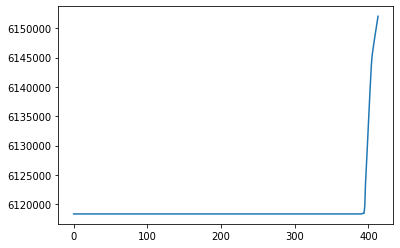

In [40]:
s = train[train['ship']==0]
plt.plot(s.x)

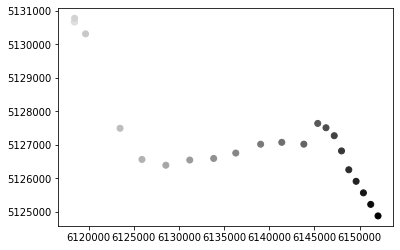

In [61]:
ss = s.loc[390:,:]
plt.scatter(ss.x,ss.y,c = range(len(ss)),cmap = 'binary')

In [84]:
ss

,ship,x,y,v,d,datetime,type,t,d_t,d_x,v_x,d_y,v_y
390,0,6.118352e+06,5.130672e+06,0.00,0,1900-11-10 07:58:20,拖网,244132,600,0.000000,0.000000,0.000000,0.000000
391,0,6.118352e+06,5.130672e+06,0.05,0,1900-11-10 08:09:17,拖网,244789,657,0.000000,0.000000,0.000000,0.000000
392,0,6.118453e+06,5.130670e+06,0.00,0,1900-11-10 08:18:20,拖网,245332,543,101.686330,0.187268,-2.528671,-0.004657
393,0,6.118453e+06,5.130670e+06,0.00,0,1900-11-10 08:28:20,拖网,245932,600,0.000000,0.000000,0.000000,0.000000
394,0,6.118455e+06,5.130779e+06,0.27,0,1900-11-10 08:38:19,拖网,246531,599,1.939021,0.003237,109.032499,0.182024
395,0,6.119668e+06,5.130312e+06,6.58,113,1900-11-10 08:48:20,拖网,247132,601,1212.514434,2.017495,-466.393080,-0.776028
396,0,6.123485e+06,5.127492e+06,8.74,105,1900-11-10 09:09:53,拖网,248425,1293,3816.791567,2.951888,-2820.558404,-2.181406
397,0,6.125911e+06,5.126561e+06,7.88,96,1900-11-10 09:18:20,拖网,248932,507,2426.079704,4.785167,-931.346770,-1.836976
398,0,6.128554e+06,5.126388e+06,9.39,83,1900-11-10 09:28:19,拖网,249531,599,2642.888601,4.412168,-172.467433,-0.287926
399,0,6.131202e+06,5.126543e+06,8.15,92,1900-11-10 09:38:19,拖网,250131,600,2648.492961,4.414155,155.283000,0.258805


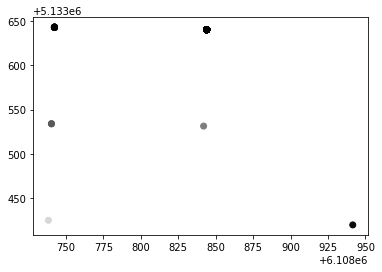

In [81]:
e = train[train['ship']==289]
plt.scatter(e.x,e.y,c = range(len(e)),cmap = 'binary')

In [82]:
e[e['v']>1]

,ship,x,y,v,d,datetime,type,t,d_t,d_x,v_x,d_y,v_y
73,289,6.108844e+06,5.133640e+06,1.03,274,1900-11-11 12:24:15,刺网,44449,601,0.000000,0.000000,0.00000,0.000000
279,289,6.108844e+06,5.133640e+06,5.40,318,1900-11-12 23:06:05,刺网,169359,602,101.659354,0.168869,-2.62487,-0.004360
280,289,6.108742e+06,5.133643e+06,10.09,314,1900-11-12 23:16:05,刺网,169959,600,-101.659354,-0.169432,2.62487,0.004375
297,289,6.108844e+06,5.133640e+06,3.99,104,1900-11-13 02:26:16,刺网,181370,601,0.000000,0.000000,0.00000,0.000000
334,289,6.108844e+06,5.133640e+06,8.69,124,1900-11-13 09:06:41,刺网,205395,606,0.000000,0.000000,0.00000,0.000000


In [83]:
e.loc[275:285,:]

,ship,x,y,v,d,datetime,type,t,d_t,d_x,v_x,d_y,v_y
275,289,6.108844e+06,5.133640e+06,0.22,104,1900-11-12 22:26:01,刺网,166955,589,0.000000,0.000000,0.00000,0.000000
276,289,6.108844e+06,5.133640e+06,0.11,0,1900-11-12 22:36:11,刺网,167565,610,0.000000,0.000000,0.00000,0.000000
277,289,6.108742e+06,5.133643e+06,0.11,0,1900-11-12 22:46:23,刺网,168177,612,-101.659354,-0.166110,2.62487,0.004289
278,289,6.108742e+06,5.133643e+06,0.22,334,1900-11-12 22:56:03,刺网,168757,580,0.000000,0.000000,0.00000,0.000000
279,289,6.108844e+06,5.133640e+06,5.40,318,1900-11-12 23:06:05,刺网,169359,602,101.659354,0.168869,-2.62487,-0.004360
280,289,6.108742e+06,5.133643e+06,10.09,314,1900-11-12 23:16:05,刺网,169959,600,-101.659354,-0.169432,2.62487,0.004375
281,289,6.108844e+06,5.133640e+06,0.11,138,1900-11-12 23:26:11,刺网,170565,606,101.659354,0.167755,-2.62487,-0.004331
282,289,6.108844e+06,5.133640e+06,0.11,306,1900-11-12 23:36:05,刺网,171159,594,0.000000,0.000000,0.00000,0.000000
283,289,6.108844e+06,5.133640e+06,0.22,323,1900-11-12 23:46:05,刺网,171759,600,0.000000,0.000000,0.00000,0.000000
284,289,6.108844e+06,5.133640e+06,0.00,329,1900-11-12 23:56:06,刺网,172360,601,0.000000,0.000000,0.00000,0.000000


In [75]:
g = train['t'].groupby(train['ship']).max()

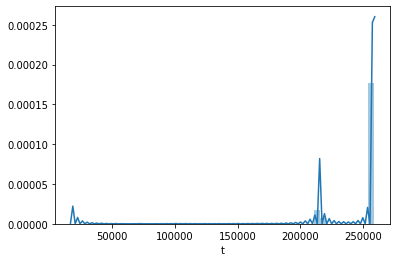

In [77]:
sns.distplot(g)

In [79]:
g[g<50000]

ship
500     33812
1787    44868
1938    16795
2796    22228
2976    37013
3566    46900
3954    17414
4356    20964
6097    41429
6746    41481
Name: t, dtype: int32

In [80]:
len(train[train['ship']==500])

39

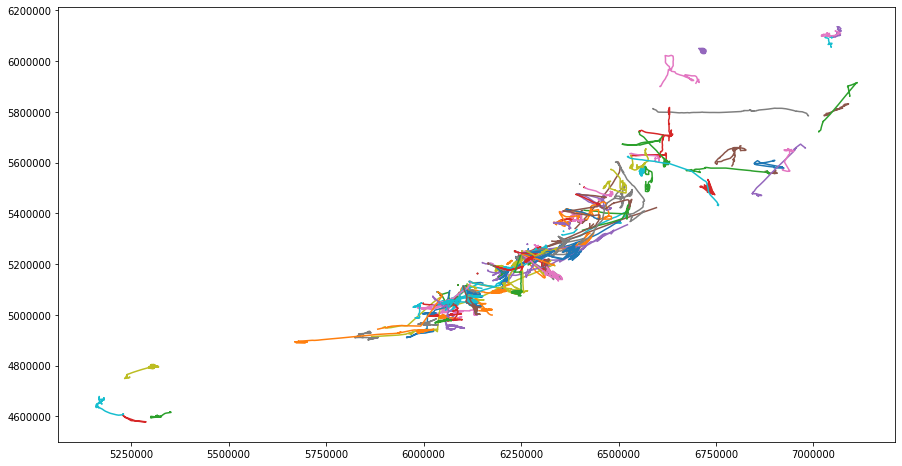

In [69]:
plt.figure(figsize=(15,8))

for i in range(200):
    x = train[train['ship']==i]
    plt.plot(x.x,x.y)

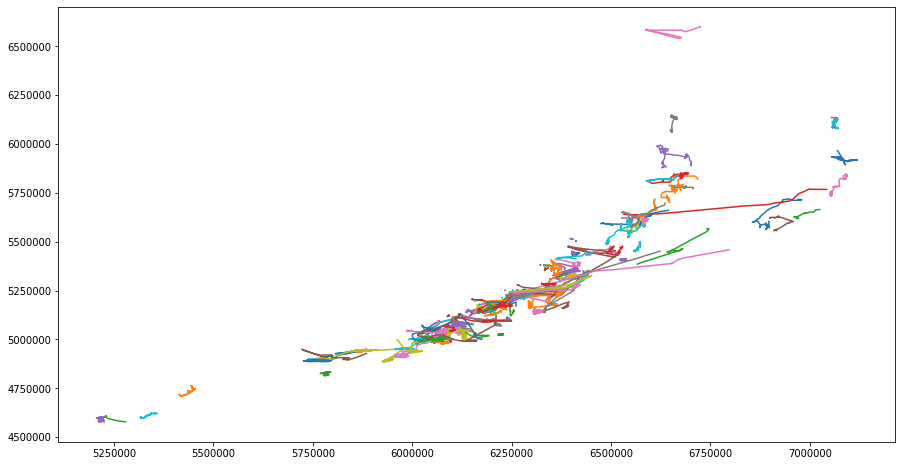

In [71]:
plt.figure(figsize=(15,8))

for i in range(7000,7200):
    x = test[test['ship']==i]
    plt.plot(x.x,x.y)

In [6]:
train.to_hdf('C:/Users/f3107/Desktop/hy_data/train_201.h5', 'df', mode='w')
test.to_hdf('C:/Users/f3107/Desktop/hy_data/test_201.h5', 'df', mode='w')